<a href="https://colab.research.google.com/github/Apple03244/Colaboratory/blob/main/Other_Parameter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 그래디언트 소실 문제

#### 초기화

각 층의 연결 가중치를 랜덤으로 초기화 하는 방법


|전략별 구분|활성화 함수|$\sigma^2$|
|--|--|--|
|글로럿|linear,tanh,softmax|$1/fan_{avg}$|
|He|Relu,LearkyRelu,GELU,Swish,Mish|$2/fan_{in}$|
|르쿤|SELU|$1/fan_{in}$|

케라스는 기본적으로 글로럿 초기화(균등분포)를 사용함

In [1]:
import tensorflow.keras as tk

In [2]:
# 기존의 방법 의외의 설정방법

- 파라미터 설멍

|파라미터|설명|
|--|--|
|scale|무작위로 초기화할때 사용되는 표준편차를 결정|
|mode|fan_in,fan_out,fan_avg|
|distribution|uniform,untruncated_normal(정규분포),truncated_normal(절단 정규분포)|

In [3]:
tk.initializers.variance_scaling(scale=2,distribution="untruncated_normal",seed=10,mode='fan_in')

### 고급 활성화 함수

### 1. Leaky ReLU

In [4]:
def leakyrelu(x,a=0.3):
  return max([a*x,x])

In [5]:
import matplotlib.pyplot as plt
import seaborn as sb

### 2. ELU&SELU

In [6]:
import numpy as np
def elu(x,a=0.2):
  if x<0:
    return a*(np.exp(x)-1)
  else:
    return x

In [7]:
def selu(x):
  return 1.05*elu(x,a=1.67)

In [8]:
import pandas as pd
dataset=dict.fromkeys(["leaky","elu","selu"])
for x in dataset:
  if x=="leaky":
    dataset[x]=list(map(leakyrelu,range(-3,3)))
  elif x=="elu":
    dataset[x]=list(map(elu,range(-3,3)))
  else:
    dataset[x]=list(map(selu,range(-3,3)))
df=pd.DataFrame(dataset)

In [9]:
df.index=range(-3,3)

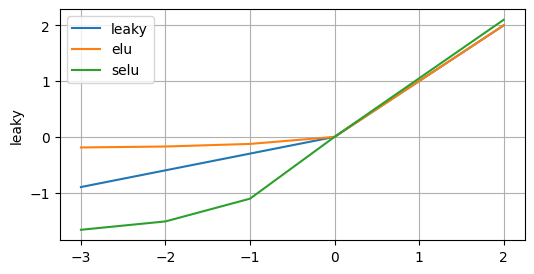

In [10]:
plt.figure(figsize=(6,3))
for x in df:
  sb.lineplot(df,x=df.index,y=df[x],label=x)
plt.grid()
plt.show()
plt.close()

### 주의사항

|함수|설명|
|--|--|
|elu|계산속도가 느림(지수함수가 포함되어있으으로)|
|selu|아래의 조선들이 필요함|

- 조건 1. 입력특성이 반드시 정규화가 되어있어야함
- 조건 2. 모든 은닉층이 르쿤 정규 분포로 초기화되어야함
- 조건 3. 일반적인 MLP(deep&wide같은 경우 적용이 안됌)에서만 적용됨.
- 조건 4. 다른 규제를 사용할 수 없음

GELU & Swish 도 참고로 알아두자

- 단, 과대적합의 문제가 있을 수 있음

## 배치 정규화

### 과정

- 1. $\eta_B = \frac{1}{m_B} \sum_{i=1}^{m_B}x^{(i)}$

- 2. $\sigma_B^2 = \frac{1}{m_B} \sum_{i=1}^{m_B}(x^{(i)}-\eta_B)^2$

- 3. $\hat x^{(i)} = \frac{x^{(i)}-\eta_B}{\sqrt {\sigma_B^2+\epsilon}}$

- 4. $z^{(i)}= r * \hat x^{(i)} + \beta$

여기서 $\epsilon$은 분모가 0이 되지않게 해주는 smoothing term 이며, 보편적으로 $10^{-5}$ 이다

## 그래디언트 클리핑

모델링 한 후 그래디언트를 봐야하므로 일단 스킵